In [56]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# League of Legends Predictor - Insights

This Jupyter Notebook is dedicated to gaining insights using data analysis into what are important attributes when it comes to winning the game of League of Legends.

The *match_summary_min.csv* data files were derived by my own script (found in the **riotGamesAPI.py** file). The script allows to specify the desired minute to which the match summary should be made. In this work I have decided to investigate the matches at these times: ***5, 10, 15, 20, 25*** and ***30*** minutes.

### Data Structure

Let´s first look at how the data is structured.

In [57]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

dir_path = os.path.join(os.getcwd(), "data")

data_5 = pd.read_csv(os.path.join(dir_path, "match_summary_5min.csv"), dtype=int).drop("Unnamed: 0", axis=1)
data_10 = pd.read_csv(os.path.join(dir_path, "match_summary_10min.csv"), dtype=int).drop("Unnamed: 0", axis=1)
data_15 = pd.read_csv(os.path.join(dir_path, "match_summary_15min.csv"), dtype=int).drop("Unnamed: 0", axis=1)
data_20 = pd.read_csv(os.path.join(dir_path, "match_summary_20min.csv"), dtype=int).drop("Unnamed: 0", axis=1)
data_25 = pd.read_csv(os.path.join(dir_path, "match_summary_25min.csv"), dtype=int).drop("Unnamed: 0", axis=1)
data_30 = pd.read_csv(os.path.join(dir_path, "match_summary_30min.csv"), dtype=int).drop("Unnamed: 0", axis=1)

The games are summarized in terms of the following features/attributes:

In [58]:
print(", ".join(list(data_5.keys())))

blueWin, blueGold, blueExp, blueLvl, blueCS, blueJngCS, blueVisionScore, blueTowerScore, blueDrakeScore, blueHeraldScore, blueBaronScore, blueKillScore, blueDeathScore, blueAssistScore, redGold, redExp, redLvl, redCS, redJngCS, redVisionScore, redTowerScore, redDrakeScore, redHeraldScore, redBaronScore, redKillScore, redDeathScore, redAssistScore, blueExpDiff, blueLvlDiff, blueGoldDiff, blueDrakeDiff, blueBaronDiff, blueHeraldDiff


The majority of the attributes are absolute, like **blueGold**, **blueExp** and others. They summarize the total power level of each of the teams, irrespective of the power level of the team. This absolute measure is more a measure of time elapsed in-game, thefore also have included other engineered features denoted by the suffix **-Diff**. These measure the relative power of both teams.

### General Data Properties

We have 6 data sets of different sizes. This is because some games end before 20 minutes as an example. That means such a game cannot be included in that dataset. This gives some general information what is the distribution of game times in the games we have analyzed (with a 5 min resolution).

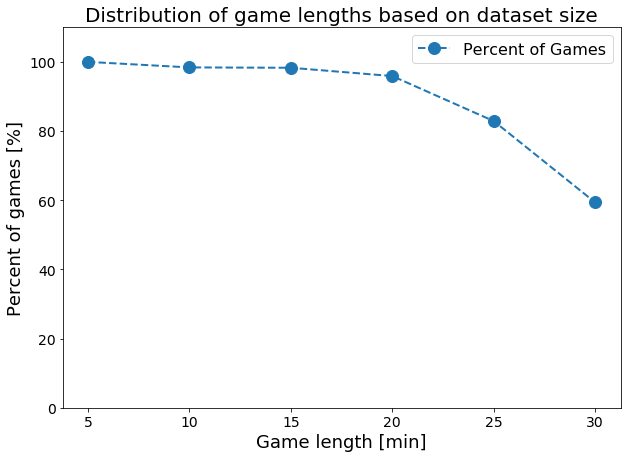

In [62]:
percent_games = [
    100,
    len(data_10)/len(data_5)*100,
    len(data_15)/len(data_5)*100,
    len(data_20)/len(data_5)*100,
    len(data_25)/len(data_5)*100,
    len(data_30)/len(data_5)*100
]

fig, ax = plt.subplots(figsize=(10,7))
ax.set_title("Distribution of game lengths based on dataset size", fontsize =20)

ax.plot([5, 10, 15, 20, 25, 30], percent_games, marker='o', linestyle='dashed', linewidth=2, markersize=12)

ax.legend(["Percent of Games"], fontsize =16)
ax.set_xticklabels([0, 5, 10, 15, 20, 25, 30, 35], fontsize=14)
ax.set_ylim(0, 110)
ax.set_yticklabels([0, 20, 40, 60, 80, 100], fontsize=14)
ax.set_xlabel("Game length [min]", fontsize=18)
ax.set_ylabel("Percent of games [%]", fontsize=18)
plt.show()

As you can see, the vast majority of games lasts at least 20 minutes. Only 80% of games are longer than 25 minutes and only 60% of games is longer than 30 minutes.

### Correlations

Let´s look at what is important to win the game. This can be done for each dataset, somewhat tentatively showing what is most important to win the game at each point of the game. Keep in mind, that especially for the earliest datasets (5min, 10min, 15min) a lot of the game time still has to be played, so we expect these correlations to be relatively weak.

In [69]:
data_5.corr()["blueWin"].sort_values(ascending=False)

blueWin            1.000000
blueGoldDiff       0.275963
blueExpDiff        0.249413
blueGold           0.210220
blueLvlDiff        0.207075
blueExp            0.184277
blueCS             0.162055
blueLvl            0.142091
blueJngCS          0.097219
redDeathScore      0.084884
blueKillScore      0.084884
blueAssistScore    0.029535
redVisionScore     0.017965
blueVisionScore   -0.046011
redCS             -0.063235
redJngCS          -0.063710
redAssistScore    -0.070269
blueDeathScore    -0.090400
redKillScore      -0.090400
redLvl            -0.107733
redExp            -0.130663
redGold           -0.196242
blueTowerScore          NaN
blueDrakeScore          NaN
blueHeraldScore         NaN
blueBaronScore          NaN
redTowerScore           NaN
redDrakeScore           NaN
redHeraldScore          NaN
redBaronScore           NaN
blueDrakeDiff           NaN
blueBaronDiff           NaN
blueHeraldDiff          NaN
Name: blueWin, dtype: float64

As yu can see, a lot of the values are *NaN*. There is nothing wrong with the data. Instead, noting that the data we inspected was for after 5 minutes of play, no drakes, heralds, barons, towers and so on could be taken at that point of the game. So that data is not relevant at that time.

In [152]:
features = list(data_5.keys())[1:]

data_all = [data_5, data_10, data_15, data_20, data_25, data_30]
correlations = {key: [] for key in features}
for data in data_all:
    corr = data.corr()["blueWin"]    
    for key in features:
        correlations[key].append(corr[key])

Let´s plot the correlation coefficients of all of the parameters for the different game lengths.

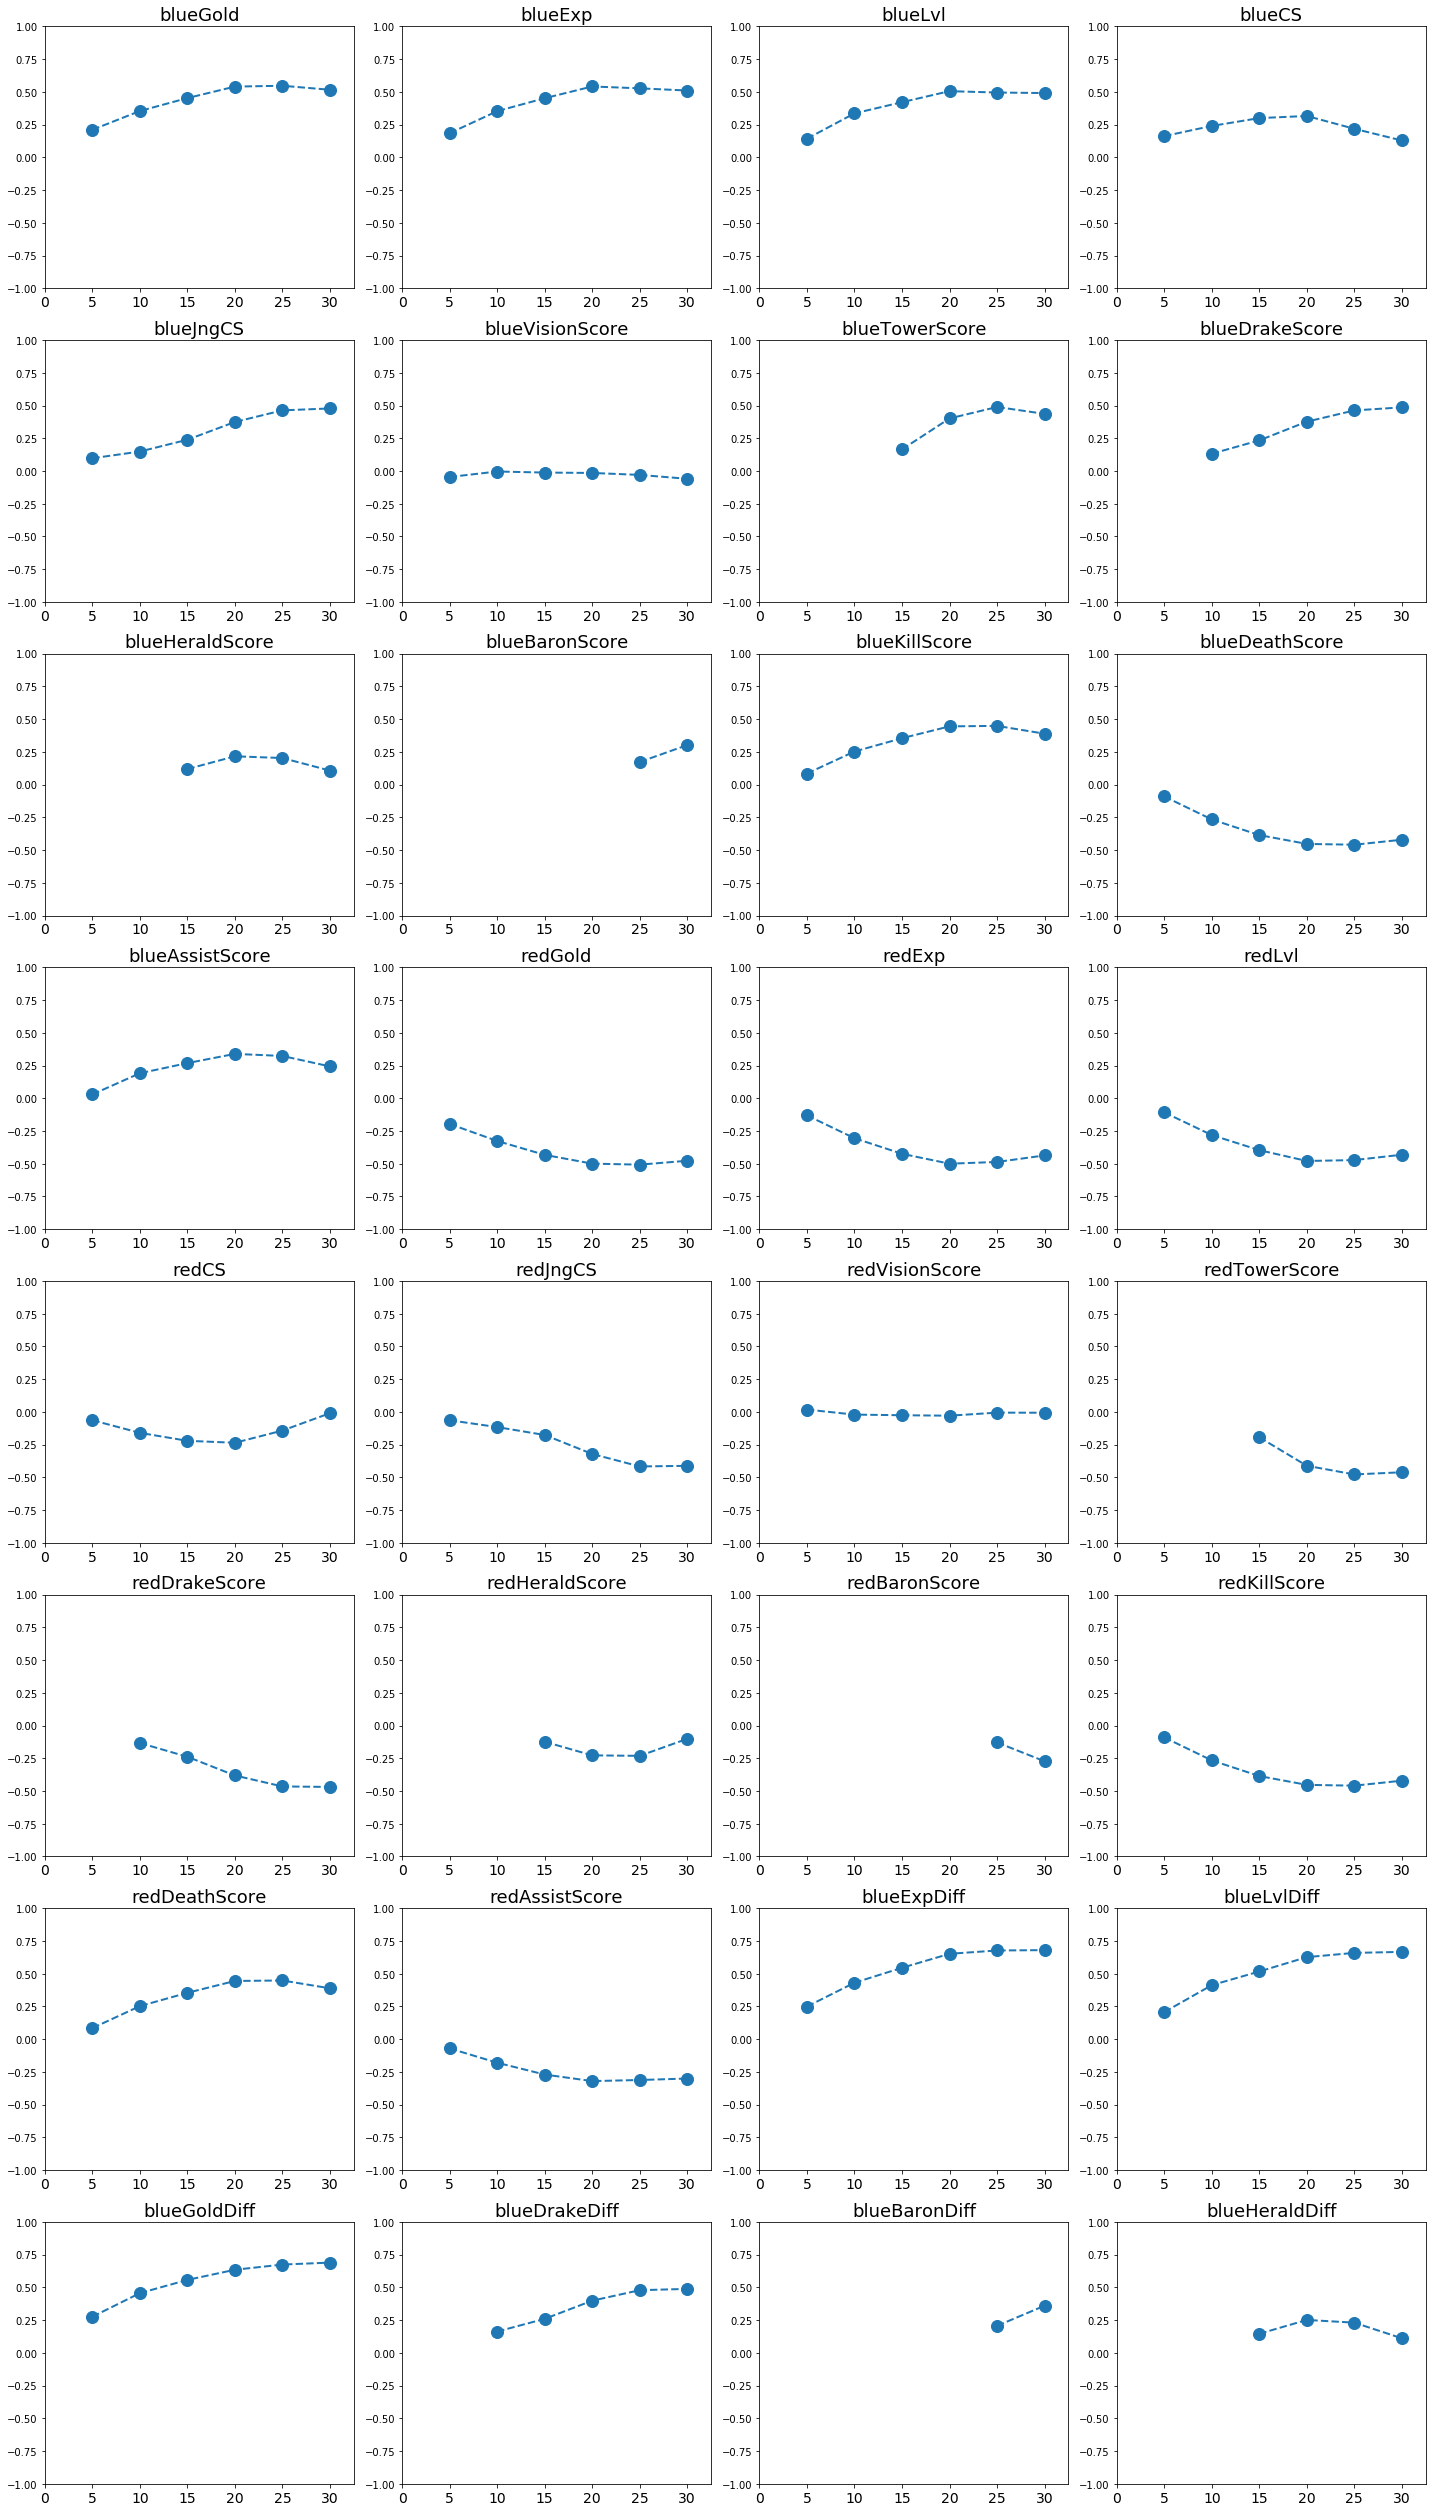

In [153]:
n_rows = 8
n_columns = 4
corr_index = np.array([i for i in range(n_rows*n_columns)]).reshape((n_rows, -1))

fig, ax = plt.subplots(n_rows, n_columns, figsize=(20,35))
 
for k in range(n_rows):
    for l in range(n_columns):
        try:
            feature = features[corr_index[k, l]]
            ax[k, l].set_title(feature, fontsize=18)
            ax[k, l].plot([5, 10, 15, 20, 25, 30], correlations[feature], marker='o', linestyle='dashed', linewidth=2, markersize=12)
            ax[k, l].set_xlim(0, 32.5)
            ax[k, l].set_xticklabels([0, 5, 10, 15, 20, 25, 30], fontsize=14)
            ax[k, l].set_ylim(-1, 1)
        except:
            pass
plt.tight_layout()      
plt.show()

Some interesting and unexpected observations can be made. 

Let´s first look at the features associated with heralds, ie. **blueHeraldScore**, **blueHeraldDiff**. One can see that its correlation with winning is largest at 20 minutes and falls of as the game gets longer. Furthermore, at 30 min killing the herald seems to lose all correlation with winning if the game reaches 30 minutes.

It´s also interesting to look at **blueGold**, **blueExp** and **blueKillScore**. It´s correlation is biggest at 20 minutes after which is saturates.